In [13]:
import pandas as pd

kegg_pathways = pd.read_csv("kegg_pathways_v1.csv")

kegg_pathways

,Pathway,Pathway Name,Metabolite,SMILES
0,map00010,Glycolysis / Gluconeogenesis,C00022,CC(=O)C(=O)O
1,map00010,Glycolysis / Gluconeogenesis,C00024,CC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(...
2,map00010,Glycolysis / Gluconeogenesis,C00031,OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O
3,map00010,Glycolysis / Gluconeogenesis,C00033,CC(=O)O
4,map00010,Glycolysis / Gluconeogenesis,C00036,O=C(O)CC(=O)C(=O)O
...,...,...,...,...
2009,map01070,Biosynthesis of plant hormones,C08814,CC(C)[C@H](C)[C@@H](O)[C@H](O)[C@@H](C)[C@H]1C...
2010,map01070,Biosynthesis of plant hormones,C09190,CC1=C[C@H](O/C=C2/C(=O)O[C@@H]3C4=C(C[C@H]23)[...
2011,map01070,Biosynthesis of plant hormones,C11434,C[C@](O)(CO)[C@H](O)COP(=O)(O)O
2012,map01070,Biosynthesis of plant hormones,C11437,CC(=O)[C@@H](O)[C@H](O)COP(=O)(O)O


In [14]:
kegg_pathways["Pathway Name"].unique()

pathways_to_delete = [0, 1, 2, 4, 5, 7, 8]
pathways_to_delete = kegg_pathways["Pathway Name"].unique()[pathways_to_delete]

kegg_pathways = kegg_pathways[~kegg_pathways["Pathway Name"].isin(pathways_to_delete)]


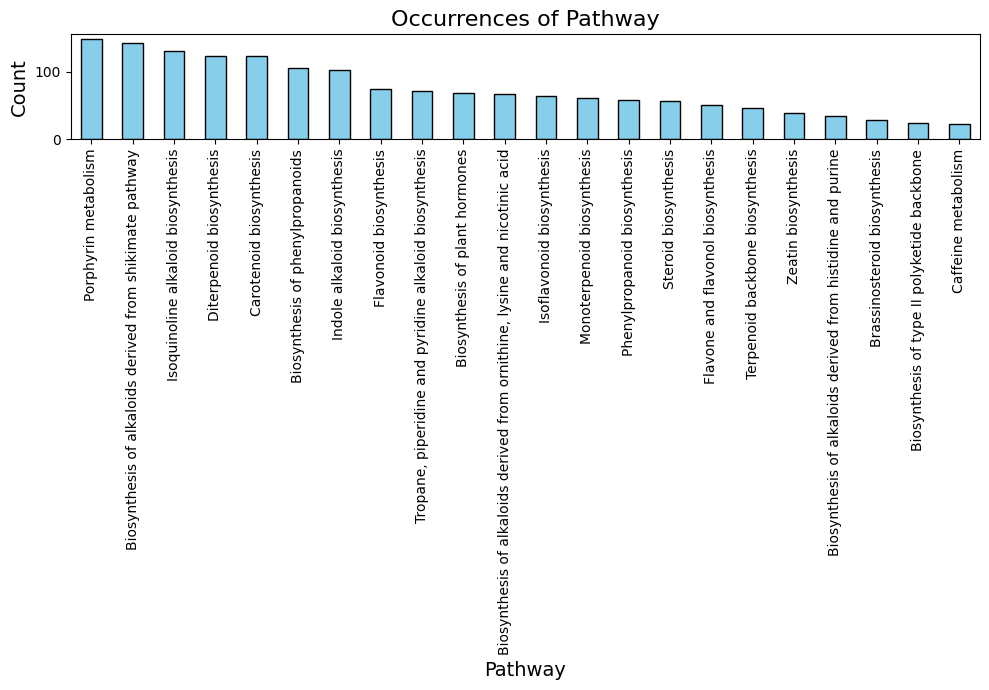

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Pathway ID
pathway_counts = kegg_pathways["Pathway Name"].value_counts()

# Plot the results
plt.figure(figsize=(10, 7))
pathway_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Occurrences of Pathway", fontsize=16)
plt.xlabel("Pathway", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.tight_layout()
plt.show()

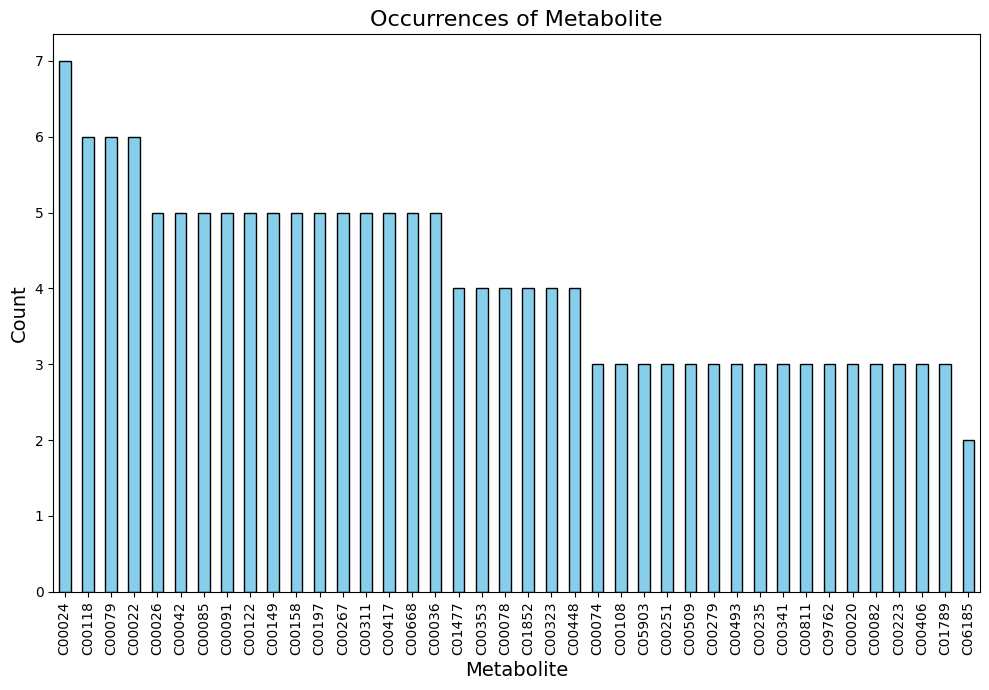

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each Pathway ID
pathway_counts = kegg_pathways["Metabolite"].value_counts()[:40]

# Plot the results
plt.figure(figsize=(10, 7))
pathway_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Occurrences of Metabolite", fontsize=16)
plt.xlabel("Metabolite", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=90, ha="center", fontsize=10)
plt.tight_layout()
plt.show()

In [19]:
to_delete = kegg_pathways["Metabolite"].value_counts()[:39].index.to_list()
kegg_pathways = kegg_pathways[~kegg_pathways["Metabolite"].isin(to_delete)]
to_delete = ["C00002", "C00008"]
kegg_pathways = kegg_pathways[~kegg_pathways["Metabolite"].isin(to_delete)]

In [ ]:
kegg_pathways = kegg_pathways.groupby(["Metabolite", "SMILES"], as_index=True).agg({"Pathway Name": list, "Pathway": list})

In [33]:
kegg_pathways["Pathway"].apply(len).describe()

count    1271.000000
mean        1.153423
std         0.360536
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Pathway, dtype: float64

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
label_array = mlb.fit_transform(kegg_pathways["Pathway Name"])

In [31]:
kegg_pathways = pd.concat((kegg_pathways, pd.DataFrame(label_array, columns=mlb.classes_)), axis=1)
kegg_pathways

,Metabolite,SMILES,Pathway Name,Pathway,Biosynthesis of alkaloids derived from histidine and purine,"Biosynthesis of alkaloids derived from ornithine, lysine and nicotinic acid",Biosynthesis of alkaloids derived from shikimate pathway,Biosynthesis of phenylpropanoids,Biosynthesis of plant hormones,Biosynthesis of type II polyketide backbone,...,Indole alkaloid biosynthesis,Isoflavonoid biosynthesis,Isoquinoline alkaloid biosynthesis,Monoterpenoid biosynthesis,Phenylpropanoid biosynthesis,Porphyrin metabolism,Steroid biosynthesis,Terpenoid backbone biosynthesis,"Tropane, piperidine and pyridine alkaloid biosynthesis",Zeatin biosynthesis
0,C00015,O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O)[C@...,[Zeatin biosynthesis],[map00908],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,C00019,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,"[Zeatin biosynthesis, Biosynthesis of plant ho...","[map00908, map01070]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,C00025,N[C@@H](CCC(=O)O)C(=O)O,"[Porphyrin metabolism, Biosynthesis of alkaloi...","[map00860, map01064]",0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,C00029,O=c1ccn([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O[C@H...,[Zeatin biosynthesis],[map00908],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,C00031,OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,C22945,CC[C@@H]1[C@@H](O)[N+]2(C)C3C[C@H]1C1[C@@H](O)...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1267,C22950,C/C=C1/CN2CC[C@]34C(=Nc5ccccc53)[C@@H]2C[C@@H]...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1268,C22951,C/C=C1/CN2CC[C@]34C(=Nc5ccccc53)[C@@H]2C[C@@H]...,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1269,C22960,C=C(C(=O)OC)c1[nH]c2ccccc2c1CCN1C=C(CC)C=CC1,[Indole alkaloid biosynthesis],[map00901],0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
kegg_pathways.to_csv("kegg_pathways_w_labels.csv", index=False)

In [2]:
import pandas as pd

kegg = pd.read_csv("kegg_pathways_w_labels.csv")
kegg.shape

(1271, 26)

In [3]:
kegg.drop_duplicates(subset=["Metabolite"]).shape

(1271, 26)